In [32]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [33]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [34]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test =x_test_image.reshape(10000, 784).astype('float32')

In [35]:
x_Train =normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [36]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
model = Sequential()

In [39]:
model.add(Dense(units=100,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [40]:
model.add(Dropout(0.5))

In [41]:
model.add (Dense(units=10,
                kernel_initializer='normal',
                 activation='softmax'))

TypeError: softmax() got an unexpected keyword argument 'axis'

In [42]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()
    show_train_history(train_history,'acc','val_acc')
    show_train_history(train_history,'loss','val_loss')
    


In [44]:

scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

RuntimeError: The model needs to be compiled before being used.

In [45]:
prediction=model.predict_classes(x_Test)

In [46]:
prediction


array([80, 41, 68, ..., 80, 16, 80], dtype=int64)

In [50]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                 prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()    


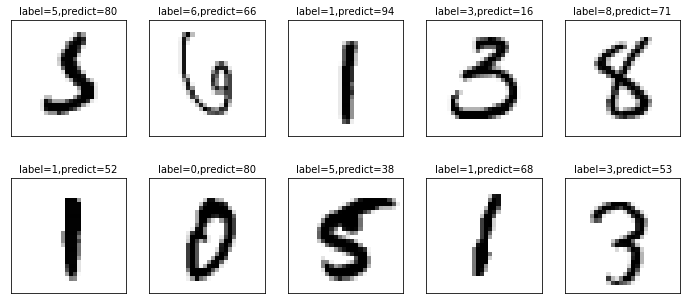

In [51]:
plot_images_labels_prediction(x_test_image,y_test_label,
                             prediction,idx=340)

In [49]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,8,9,12,13,...,84,86,88,89,90,92,93,94,96,98
label,,,,,,,,,,,,,,,,,,,,,
0,0,5,5,0,0,0,0,73,5,0,...,0,0,1,3,0,20,2,3,41,0
1,5,7,0,0,0,10,0,60,0,0,...,0,2,0,0,10,0,0,46,68,0
2,1,2,4,10,0,0,0,118,5,0,...,0,0,0,1,1,8,8,27,12,1
3,1,18,1,1,1,0,0,94,17,0,...,0,0,0,0,2,0,4,27,6,2
4,0,1,30,0,1,0,0,6,8,0,...,0,0,0,1,0,2,0,5,72,3
5,0,5,2,3,0,0,0,44,15,2,...,1,0,0,1,1,1,0,33,17,0
6,0,24,1,2,0,0,0,20,2,0,...,0,0,0,0,3,23,21,10,53,0
7,0,1,12,0,1,0,1,39,2,0,...,0,0,0,3,1,1,0,54,53,0
8,0,1,2,0,0,0,0,12,16,0,...,0,1,0,1,2,0,7,11,51,0
